# Homework 1

## Question 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

%matplotlib inline

df=pd.read_csv('house_prices.csv')

house_age=df[['house age']].to_numpy()
distance=df[['distance to the nearest MRT station']].to_numpy()
no_con=df[['number of convenience stores']].to_numpy()
price=df[['house price of unit area']].to_numpy()


house_age_norm=(house_age-house_age.min())/(house_age.max()-house_age.min())
distance_norm=(distance-distance.min())/(distance.max()-distance.min())
no_con_norm=(no_con-no_con.min())/(no_con.max()-no_con.min())



## Question 2

In [5]:
age_split=np.split(house_age_norm,[300,])
train_age=age_split[0]
test_age=age_split[1]

distance_split=np.split(distance_norm,[300,])
train_dist=distance_split[0]
test_dist=distance_split[1]

con_split=np.split(no_con_norm,[300,])
train_con=con_split[0]
test_con=con_split[1]

price_split=np.split(price,[300,])
train_price=price_split[0]
test_price=price_split[1]

print(train_dist)




[[0.0103754 ]
 [0.33439538]
 [0.15313435]
 [0.03515249]
 [0.69408002]
 [0.05065537]
 [0.07199729]
 [0.05679909]
 [0.07252509]
 [0.4151832 ]
 [0.03956753]
 [0.05679909]
 [0.04664748]
 [0.2202603 ]
 [0.03515249]
 [0.05906449]
 [0.04113795]
 [0.05482329]
 [0.07252509]
 [0.02861841]
 [0.04087153]
 [0.05758897]
 [0.20677973]
 [0.063214  ]
 [0.24136527]
 [0.05679909]
 [0.69552341]
 [0.69408002]
 [0.29997737]
 [0.03515249]
 [0.03876962]
 [0.23680632]
 [0.02577969]
 [0.09173252]
 [0.07252509]
 [0.05708952]
 [0.26485816]
 [0.04113795]
 [0.02796563]
 [0.12596845]
 [0.07252509]
 [0.04881713]
 [0.98580926]
 [0.26130607]
 [0.05482865]
 [0.02439328]
 [0.06426786]
 [0.35031012]
 [0.21524084]
 [0.07195915]
 [0.07606448]
 [0.09173252]
 [0.28522094]
 [0.62782047]
 [0.62543395]
 [0.07252509]
 [0.06618483]
 [0.02414226]
 [0.08597936]
 [0.06781539]
 [0.11353379]
 [0.0263281 ]
 [0.06158058]
 [0.00529134]
 [0.17573623]
 [0.12259751]
 [0.07890517]
 [0.06624641]
 [0.04881713]
 [0.04113795]
 [0.30245903]
 [0.26

## Question 3
Now in this part, you need to fit a regression model that predicts the unit house price from the house age;
so, you have to estimate the regression parameters � from the training set. 

In [76]:
# h(x)=theta_0 + theta_1 * x, where x is the house feature
# j(theta) = MSE
# cost function which calculates cost
# gradient descent function which calculates new thetas
#theta_0 = -1, theta_1 = -0.5

def cal_cost(theta, X, y):
    m=len(y)  
    predictions= X.dot(theta)
    cost=(1/m) * np.sum(np.square(y-predictions))
    return cost

def stoc_desc_grad(X,y,theta,lr,iterations):
    m=len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost=0.0
        for i in range(m):
            X_i=X[i,:].reshape(1,X.shape[1])
            y_i=y[i].reshape(1,1)
            prediction=np.dot(X_i,theta)
            
            theta=theta+lr*(X_i.T.dot(y_i-prediction))
            predictions=X_i.dot(theta)
            cost +=  cal_cost(theta,X_i,y_i)
        cost_history[it] = cost
            
    return theta,cost_history

#y[j]-(theta_zero+theta_one*X[j])
#cost=(1/m)*

def calc_theta(lr, n_iter, theta, train_x, train_y):
    X_b=np.c_[np.ones((len(train_x),1)),train_x]
    theta,cost_history=stoc_desc_grad(X_b,train_price,theta,lr,n_iter)
    return theta, cost_history
            
lr=0.01
n_iter=50

theta=np.array([[-1],[-0.5]])

theta_age, cost_history_age=calc_theta(lr,n_iter,theta,train_age,train_price)
sqrt_age=math.sqrt(cost_history_age[-1])
theta_dist, cost_history_dist=calc_theta(lr,n_iter,theta,train_dist,train_price)
sqrt_dist=math.sqrt(cost_history_dist[-1])
theta_con, cost_history_con=calc_theta(lr,n_iter,theta,train_con,train_price)
sqrt_con=math.sqrt(cost_history_con[-1])

print('Training Age')
print(theta_age)
print('Final cost/MSE:  {:0.8f}'.format(cost_history_age[-1]))
print('Final cost/RMSE:  {:0.8f}'.format(sqrt_age))
print('\n')
print('Training Distance')
print(theta_dist)
print('Final cost/MSE:  {:0.8f}'.format(cost_history_dist[-1]))
print('Final cost/RMSE:  {:0.8f}'.format(sqrt_dist))
print('\n')
print('Training Number of Stores')
print(theta_con)
print('Final cost/MSE:  {:0.8f}'.format(cost_history_con[-1]))
print('Final cost/RMSE:  {:0.8f}'.format(sqrt_con))

print(cost_history_age)






Training Age
[[ 42.54078538]
 [-10.31939902]]
Final cost/MSE:  42808.03076097
Final cost/RMSE:  206.90101682


Training Distance
[[ 44.76608704]
 [-46.50063397]]
Final cost/MSE:  24901.16788597
Final cost/RMSE:  157.80103893


Training Number of Stores
[[27.48667613]
 [25.64211765]]
Final cost/MSE:  28490.41078474
Final cost/RMSE:  168.79102697
[111916.13911652  49883.31897423  47904.46042655  46447.82869824
  45405.70922351  44661.67741785  44130.54729234  43751.43066405
  43480.84687309  43287.74793457  43149.96426282  43051.66636983
  42981.5521702   42931.55248224  42895.90659917  42870.50214447
  42852.40366316  42839.51599592  42830.34390523  42823.82043666
  42819.18436449  42815.89268819  42813.55815788  42811.90467211
  42810.73543726  42809.91023876  42809.32921823  42808.9212954
  42808.63590602  42808.43710701  42808.29937121  42808.20458819
  42808.13992573  42808.09630536  42808.06731617  42808.04844108
  42808.03650601  42808.02928799  42808.0252365   42808.02327553
  42

## Question 4

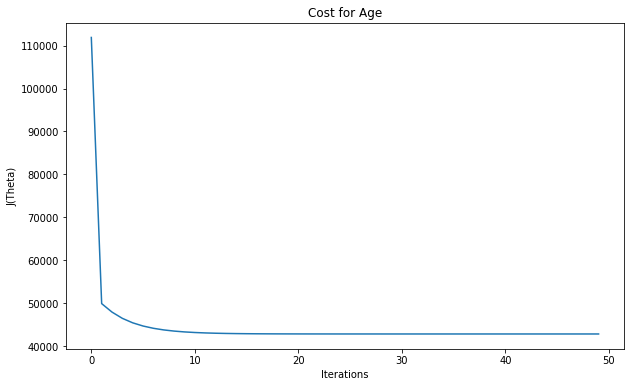

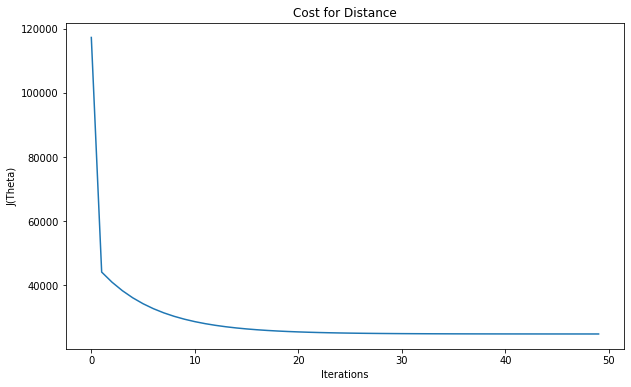

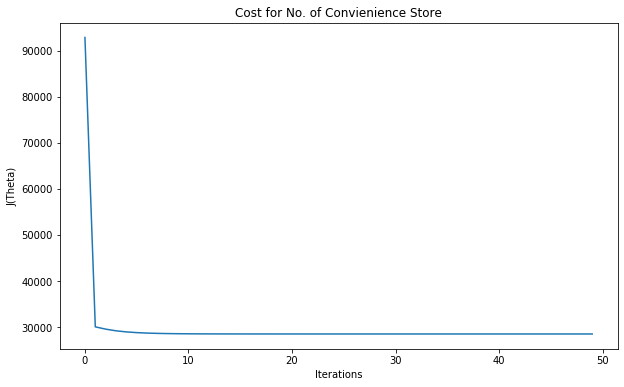

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Cost for Age')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history_age)

fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Cost for Distance')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history_dist)

fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Cost for No. of Convienience Store')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history_con)
    


In [68]:
'''
get the thetas of the training data
For the given x value of the test set, find the predicted y value
get the actual y value of the test set, and do the calc_cost formula
'''

def rmse_cost(theta,X,y):
    m=len(y)
    cost=0.0
    print(theta)
    for i in range(m):
        cost=cost+(y[i]-(theta[0]+theta[1]*X[i]))**2
        
    RMSE=math.sqrt((1/m)*cost)
    return RMSE

def RMSE_d(theta, test_x_b, test_y):
    m=len(test_y)

    MSE=0.0
    for i in range(m):
        X_i=test_x_b[i,:].reshape(1,test_x_b.shape[1])
        y_i=test_y[i].reshape(1,1)
        prediction=np.dot(X_i,theta)
        
        MSE += (1/m) * np.sum(np.square(y_i-prediction))
    RMSE=math.sqrt(MSE)
    return RMSE
            

test_x_b=np.c_[np.ones((len(test_age),1)),test_age]
print('Age')
RMSE_age=rmse_cost(theta_age,test_age,test_price)
print('RMSE Age')
print(RMSE_age)
print('NEW rmse')
print(RMSE_d(theta_age,test_x_b,test_price))
print('\n')

print('Distance')
RMSE_dist=rmse_cost(theta_dist,test_dist,test_price)
print('RMSE Distance')
print(RMSE_dist)
print('\n')
   
print('Con')
RMSE_con=rmse_cost(theta_con,test_con,test_price)
print('RMSE No. Con Stores')
print(RMSE_con)
print('\n')


Age
[[ 42.54078538]
 [-10.31939902]]
RMSE Age
16.58731450340051
NEW rmse
16.58731450340051


Distance
[[ 44.76608704]
 [-46.50063397]]
RMSE Distance
12.652088009723935


Con
[[27.48667613]
 [25.64211765]]
RMSE No. Con Stores
14.731993508206784




In [53]:
'''
def cal_cost(theta, X, y):
    m=len(y)  
    predictions= X.dot(theta)
    cost=(1/m) * np.sum(np.square(y-predictions))
    return cost

def stoc_desc_grad(X,y,theta,lr,iterations):
    m=len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost=0.0
        for i in range(m):
            X_i=X[i,:].reshape(1,X.shape[1])
            y_i=y[i].reshape(1,1)
            prediction=np.dot(X_i,theta)
            
            theta=theta+lr*(X_i.T.dot(y_i-prediction))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it] = cost
            
    return theta,cost_history

def calc_theta(lr, n_iter, theta, train_x, train_y):
    X_b=np.c_[np.ones((len(train_x),1)),train_x]
    theta,cost_history=stoc_desc_grad(X_b,train_price,theta,lr,n_iter)
    return theta, cost_history

'''

        
def stoc_grad(X,y,theta,lr,iterations):
    m=len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost=0.0
        for i in range(m):
            X_i=X[i,:].reshape(1,X.shape[1])
            y_i=y[i].reshape(1,1)
            theta0_update=theta[0] + lr * 1 * (y[i]-(theta[0]+theta[1]*X[i]))
            theta1_update=theta[1] + lr * X[i] * (y[i]-(theta[0]+theta[1]*X[i]))
            theta[0]=theta0_update
            theta[1]=theta1_update
    print(theta[0])
    print(theta[1])
    return theta
            
        
def calc_theta(lr, n_iter, theta, train_x, train_y):
    X_b=np.c_[np.ones((len(train_x),1)),train_x]
    theta=stoc_grad(X_b,train_price,theta,lr,n_iter)
    return theta

theta_age_bran=calc_theta(lr,n_iter,theta,train_age,train_price)

ValueError: could not broadcast input array from shape (2) into shape (1)